# K - Meann Clustering

In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [61]:
# model

from sklearn.cluster import KMeans
#(normalize krne k liye)
from sklearn.preprocessing import StandardScaler

# import data in featured
X= df[['age','fare']]
X.age.fillna(df['age'].mean(), inplace=True)


# Scaled data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#perform Clustering
kmeans_model = KMeans(n_clusters=5) # (ya apani merzi h number of cluster dena)
kmeans_model.fit(X_scaled)

# assign cluster labels to the data 
df['cluster'] = kmeans_model.labels_

C:\Users\Abdul Hannan\AppData\Local\Temp\ipykernel_3316\3282259135.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\Users\Abdul Hannan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [62]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,cluster
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,2
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0


In [63]:
df['cluster'].nunique()

5

In [64]:
df['cluster'].unique()

array([2, 1, 0, 3, 4])

Text(0, 0.5, 'fare')

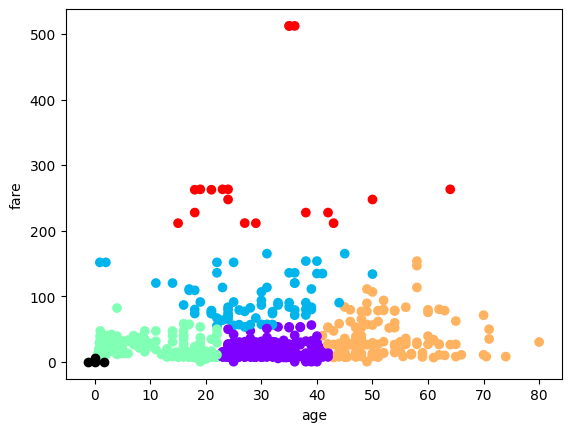

In [65]:
plt.scatter(df['age'],df['fare'],c=df['cluster'], cmap='rainbow')
plt.scatter(kmeans_model.cluster_centers_[:,0], kmeans_model.cluster_centers_[:,1], color='black')
plt.xlabel('age')
plt.ylabel('fare')

In [66]:
pip install nbformat

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [67]:
import plotly.express as px
fig= px.scatter(df, x='age', y='fare',color='cluster')
fig.show()

In [68]:
import plotly.express as px
fig= px.scatter_3d(df, x='age', y='fare', z= 'pclass', color='cluster')
fig.show()

In [69]:
fig = px.parallel_coordinates(df, color='cluster', title='Titanic Cluster')
fig.show()

In [70]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [71]:
pip install pickle

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [72]:
# Saving the model
import joblib
joblib.dump(kmeans_model,'KMeansClustering.joblib')

['KMeansClustering.joblib']

In [73]:
# load the save model
model_loaded = joblib.load('KMeansClustering.joblib')

In [74]:
import seaborn as sns
df_1= sns.load_dataset('tips')
df_1

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [75]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [76]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [77]:
from sklearn.preprocessing import LabelEncoder

le= LabelEncoder()
le.fit(df_1['smoker']) # fit ka mtlba hota h data ko train krna data ko dikhna 
df_1['smoker'] = le.transform(df_1['smoker'])
df_1

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,0,Sun,Dinner,2
1,10.34,1.66,Male,0,Sun,Dinner,3
2,21.01,3.50,Male,0,Sun,Dinner,3
3,23.68,3.31,Male,0,Sun,Dinner,2
4,24.59,3.61,Female,0,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,0,Sat,Dinner,3
240,27.18,2.00,Female,1,Sat,Dinner,2
241,22.67,2.00,Male,1,Sat,Dinner,2
242,17.82,1.75,Male,0,Sat,Dinner,2


In [78]:
le= LabelEncoder()
le.fit(df_1['day']) # fit ka mtlba hota h data ko train krna data ko dikhna 
df_1['day'] = le.transform(df_1['day'])
df_1

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,0,2,Dinner,2
1,10.34,1.66,Male,0,2,Dinner,3
2,21.01,3.50,Male,0,2,Dinner,3
3,23.68,3.31,Male,0,2,Dinner,2
4,24.59,3.61,Female,0,2,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,0,1,Dinner,3
240,27.18,2.00,Female,1,1,Dinner,2
241,22.67,2.00,Male,1,1,Dinner,2
242,17.82,1.75,Male,0,1,Dinner,2


In [79]:
le= LabelEncoder()
le.fit(df_1['time']) # fit ka mtlba hota h data ko train krna data ko dikhna 
df_1['time'] = le.transform(df_1['time'])
df_1

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,0,2,0,2
1,10.34,1.66,Male,0,2,0,3
2,21.01,3.50,Male,0,2,0,3
3,23.68,3.31,Male,0,2,0,2
4,24.59,3.61,Female,0,2,0,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,0,1,0,3
240,27.18,2.00,Female,1,1,0,2
241,22.67,2.00,Male,1,1,0,2
242,17.82,1.75,Male,0,1,0,2


In [80]:
X= df_1.drop(columns=['sex'])
y= df_1['sex']

In [81]:
X.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,0,2,0,2
1,10.34,1.66,0,2,0,3
2,21.01,3.50,0,2,0,3
3,23.68,3.31,0,2,0,2
4,24.59,3.61,0,2,0,4


In [82]:
y.head()

0    Female
1      Male
2      Male
3      Male
4    Female
Name: sex, dtype: category
Categories (2, object): ['Male', 'Female']

In [83]:
df_1.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [84]:
from sklearn.tree import DecisionTreeClassifier

# model = DecisionTreeClassifier()
# model.fit(X,y)

#An other way to write this code

model = DecisionTreeClassifier().fit(X,y) 

In [85]:
joblib.dump(model,'tipswalamodel.joblib')

['tipswalamodel.joblib']

In [87]:
model_1 = joblib.load('tipswalamodel.joblib')

In [89]:
# pickel ki library builtin hoti h 
# save the model
import pickle
with open('model.pkl', 'wb') as f: pickle.dump(model, f)

# load the model
with open('model.pkl','rb') as f: model_loaded= pickle.load(f)